In [39]:
import seaborn as sns
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
%matplotlib inline


In [2]:
# A function to get me some financial data, SPX and AAPL in this case
def daily_close(ticker, start_date, end_date):

    # Ticker as 4 letter string
    # Start date and end date as datetime

    av = TimeSeries(key='SJA94IVRELN62B8S', output_format='pandas')

    df = av.get_daily(symbol=ticker, outputsize='full')[0]    

    start_date = start_date.date()
    end_date = end_date.date()

    df.index = [dt.datetime.strptime(i, '%Y-%m-%d').date() for i in df.index]

    while start_date not in df.index:
        start_date = start_date + dt.timedelta(days=1)
    while end_date not in df.index:
        end_date = end_date + dt.timedelta(days=1)

    return df[start_date:end_date]['4. close']

In [3]:
# Use the above function to get my data
start = dt.datetime(2018,1,1)
end = dt.datetime(2018,11,1)

aapl = pd.DataFrame(daily_close('AAPL', start, end))
sp = pd.DataFrame(daily_close('SPX', start, end))

In [29]:
# Get a set of returns for the SPX and AAPL
df = aapl
df['SP500'] = sp['4. close']
df.rename(columns={'4. close':'AAPL'}, inplace = True)
df = df*100/df.iloc[0]

df = df/df.shift(-1)-1
df.fillna(0, inplace=True)

# Adding some more columns to the data so I can mess around with other plot types
df['day_type'] = ['Up' if i>0 else 'Down' for i in df['SP500']]
df['market_12m_rolling'] = sp/sp.shift(-12)-1
df['12m_day_type'] = ['Up' if i>0 else 'Down' for i in df['market_12m_rolling']]

C:\Users\rfg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


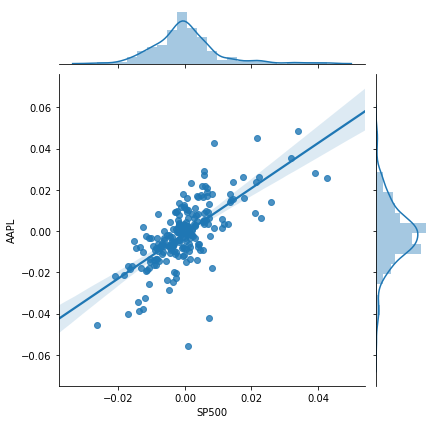

In [5]:
# Messing around with Seaborn using the above data

sns.jointplot(x='SP500', y='AAPL', data=df, kind='reg')

C:\Users\rfg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


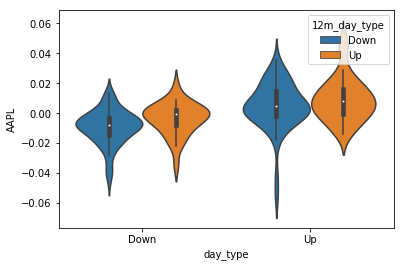

In [30]:
# Categorical plots are probably less useful but nonetheless still good fun to mess around with
#sns.boxplot(x='day_type', y='AAPL', data=df)
sns.violinplot(x='day_type', y='AAPL', data=df, hue='12m_day_type')

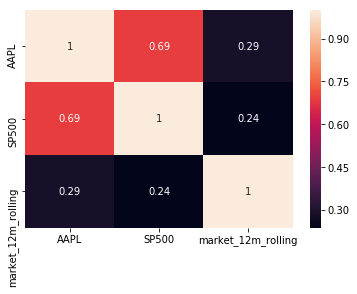

In [36]:
# Matrix plots:
# Column and row index must be of equal size, this defines a matrix for this purpose

df_corr = df.corr()
sns.heatmap(df_corr, annot=True)

C:\Users\rfg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


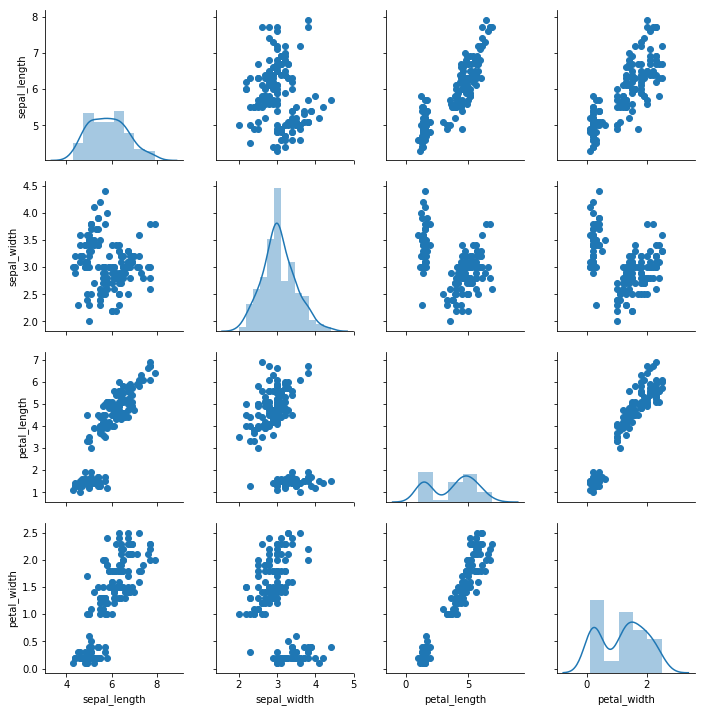

In [44]:
# Grid plotting using the iris dataset

iris = sns.load_dataset('iris')

g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)
g.map_diag(sns.distplot)

C:\Users\rfg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


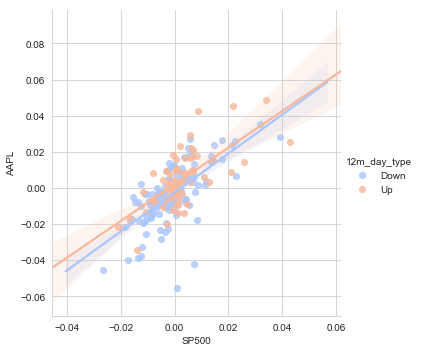

In [57]:
sns.lmplot(x='SP500',y='AAPL',data=df, hue='12m_day_type', palette='coolwarm')


C:\Users\rfg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


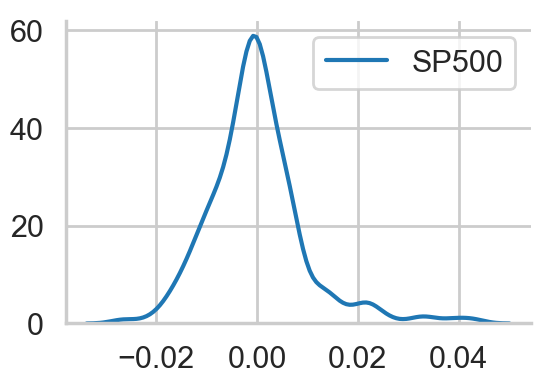

In [61]:
plt.figure(dpi=100) # You can use the plt.figure() to pass matplotlib args to seaborn
sns.set_style('whitegrid')
sns.set_context('poster')

sns.kdeplot(df['SP500'])

sns.despine()
